In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [5]:
import numpy as np
import os
import gzip

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [7]:
from sklearn.model_selection import train_test_split
# 注意housing本身的转变 以及train_test_split参数设置
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [12]:
def customized_mse(y_true, y_pred):
    # tf.reduce_mean函数用于计算张量tensor沿着指定的数轴（tensor的某一维度）上的的平均值
    return tf.reduce_mean(tf.square(y_true - y_pred))

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.Dense(1)
])
model.summary()
model.compile(loss=customized_mse, optimizer='adam',
              metrics=['mse'])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
def draw_learning_curve(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid()
    plt.ylim(0, 1)
    plt.show()

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 109us/sample - loss: 1.4588 - mse: 1.4588 - val_loss: 0.8372 - val_mse: 0.8372
Epoch 2/10
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6156 - mse: 0.6156 - val_loss: 0.5682 - val_mse: 0.5682
Epoch 3/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4708 - mse: 0.4708 - val_loss: 0.4717 - val_mse: 0.4717
Epoch 4/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4229 - mse: 0.4229 - val_loss: 0.4424 - val_mse: 0.4424
Epoch 5/10
11610/11610 [==============================] - 1s 48us/sample - loss: 0.4070 - mse: 0.4070 - val_loss: 0.4233 - val_mse: 0.4233
Epoch 6/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3960 - mse: 0.3960 - val_loss: 0.4080 - val_mse: 0.4080
Epoch 7/10
11610/11610 [==============================] - 1s 47us/sample - loss: 0.3903 - mse: 0.3903 - val_loss: 0.

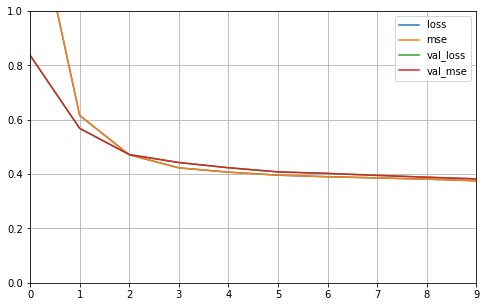

In [13]:
history = model.fit(x_train_scaled, y_train,
                   validation_data = [x_valid_scaled, y_valid],
                   epochs=10, callbacks=callbacks)
draw_learning_curve(history)

In [ ]:
model.evaluate(x_test_scaled, y_test)